In [401]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms

%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
sns.set_context("notebook")
plt.style.use('dark_background')
plt.rcParams["font.size"] = 18

In [402]:
x_data = np.array([5], dtype=np.float32)

In [403]:
x = torch.Tensor(x_data)
x.requires_grad = True

In [404]:
y = x**2 - 2*x + 1

In [405]:
y.backward()

In [406]:
x.grad

tensor([8.])

In [77]:
x = torch.tensor(5.0, requires_grad=True)
z = 2 * x
z.retain_grad()
y = x**2 - z + 1

In [78]:
y.backward()

In [79]:
z.grad

tensor(-1.)

In [80]:
x.grad

tensor(8.)

In [83]:
x = torch.tensor(np.array([[1,2,3],[4,5,6]], dtype=np.float32), requires_grad=True)

In [85]:
y = x**2 - 2*x + 1

In [91]:
y.backward(torch.tensor(np.ones((2,3), dtype=np.float32)))

In [92]:
x.grad

tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])

In [110]:

y = x**2 - x + 1

In [174]:
lr0 = 0.1
lr1 = 0.01
lr2 = 0.001
lr3 = 0.0001

epoch = 1000
y_stoch0 = []
y_stoch1 = []
y_stoch2 = []
y_stoch3 = []
x = torch.tensor(5.0, requires_grad=True)

In [175]:
x = torch.tensor(5.0, requires_grad=True)
for e in range(epoch):
    y = x**2 - x + 1
    y.backward()
    with torch.no_grad(): ## dataのみにアクセス
        x -= lr0 * x.grad
        x.grad.zero_() ## 微分を初期化
    y_stoch0.append(y.item())

In [176]:
x = torch.tensor(5.0, requires_grad=True)
for e in range(epoch):
    y = x**2 - x + 1
    y.backward()
    with torch.no_grad(): ## dataのみにアクセス
        x -= lr1 * x.grad
        x.grad.zero_() ## 微分を初期化
    y_stoch1.append(y.item())

In [177]:
x = torch.tensor(5.0, requires_grad=True)
for e in range(epoch):
    y = x**2 - x + 1
    y.backward()
    with torch.no_grad(): ## dataのみにアクセス
        x -= lr2 * x.grad
        x.grad.zero_() ## 微分を初期化
    y_stoch2.append(y.item())

In [178]:
x = torch.tensor(5.0, requires_grad=True)
for e in range(epoch):
    y = x**2 - x + 1
    y.backward()
    with torch.no_grad(): ## dataのみにアクセス
        x -= lr3 * x.grad
        x.grad.zero_() ## 微分を初期化
    y_stoch3.append(y.item())

In [179]:
print('y_min: {}'.format(y_stoch[-1]))
print('x_min: {}'.format(x))

y_min: 1.120890736579895
x_min: 4.1842145919799805


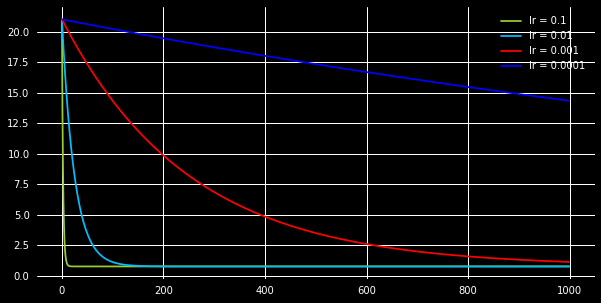

In [180]:
plt.figure(figsize=(10,5))
xx =np.arange(epoch)
plt.plot(xx, y_stoch0, label = 'lr = 0.1', color='yellowgreen')
plt.plot(xx, y_stoch1, label = 'lr = 0.01', color='deepskyblue')
plt.plot(xx, y_stoch2, label = 'lr = 0.001', color='red')
plt.plot(xx, y_stoch3, label = 'lr = 0.0001', color='blue')
plt.legend()

## 計算グラフの確認
$ f(x,y,z) = (x+y)z$  
$q = x+y$  
$f = qz$  
$x = -2, y = 5, z = -4$

In [183]:
x = torch.tensor([-2.0], requires_grad=True)
y = torch.tensor([5.0], requires_grad=True)
z = torch.tensor([-4.0], requires_grad=True)

In [184]:
q = x + y
q.retain_grad()
f = q * z

In [185]:
f.backward()

In [189]:
print('q:{0}, x:{1}, y:{2}, z:{3}'.format(q.grad[0], x.grad[0], y.grad[0], z.grad[0]))

q:-4.0, x:-4.0, y:-4.0, z:3.0


演習2.1

In [200]:
w = np.array([2, -3, -3], dtype=np.float32)
x = np.array([-1, -2, 1], dtype=np.float32)
w = torch.tensor(w, requires_grad=True)
x = torch.tensor(x, requires_grad=True)

In [201]:
z = torch.dot(w, x)

In [202]:
f = 1 / (1 + torch.exp(-z))

In [203]:
f.backward()

In [217]:
print('w0:{0:.2f}, w1:{1:.2f}, w2:{2:.2f}'.format(w.grad[0], w.grad[1], w.grad[2]))
print('x0:{0:.2f}, x1:{1:.2f}'.format(x.grad[0], x.grad[1]))

w0:-0.20, w1:-0.39, w2:0.20
x0:0.39, x1:-0.59


演習2.2

In [243]:
z = []
W = np.array([[1,2,3],[4,5,6]],dtype=np.float32)
WW = torch.tensor(W, requires_grad=True)
x = np.array([10,20,30],dtype=np.float32).reshape(3,1)
xx = torch.tensor(x, requires_grad=True)

In [248]:
print(WW.size())
print(xx.size())

torch.Size([2, 3])
torch.Size([3, 1])


z = Wx

In [253]:
z = torch.mm(WW, xx)

In [254]:
squared_sum = torch.sum(z**2)

In [255]:
squared_sum.backward()

In [256]:
WW.grad

tensor([[ 2800.,  5600.,  8400.],
        [ 6400., 12800., 19200.]])

In [322]:
x = np.array([[0.05, 0.10]], np.float32)
w1 = np.array([[0.15, 0.20], [0.25, 0.30]], np.float32)
b1 = np.array([0.35, 0.35], np.float32)
x = torch.tensor(x, requires_grad=True)
W_1 = torch.tensor(w1, requires_grad=True)
b_1 = torch.tensor(b1, requires_grad=True)

In [267]:
L1 = F.linear(x, W_1, b_1)
h1 = torch.sigmoid(L1)

In [270]:
print(L1.data[0])
print(h1.data[0])

tensor([0.3775, 0.3925])
tensor([0.5933, 0.5969])


In [323]:
w2 = np.array([[0.40, 0.45], [0.50, 0.55]], np.float32)
b2 = np.array([0.6, 0.6], np.float32)
W_2 = torch.tensor(w2, requires_grad=True)
b_2 = torch.tensor(b2, requires_grad=True)

In [273]:
L2 = F.linear(h1, W_2, b_2)
y = torch.sigmoid(L2)

In [274]:
print(L2.data[0])
print(y.data[0])

tensor([1.1059, 1.2249])
tensor([0.7514, 0.7729])


In [277]:

error_vec = (y - target_y)**2
loss = 1/2 * torch.sum(error_vec)

In [286]:
loss

tensor(0.2044, grad_fn=<MulBackward>)

In [343]:
x = np.array([[0.05, 0.10]], np.float32)
w1 = np.array([[0.15, 0.20], [0.25, 0.30]], np.float32)
b1 = np.array([0.35, 0.35], np.float32)
x = torch.tensor(x, requires_grad=True)
W_1 = torch.tensor(w1, requires_grad=True)
b_1 = torch.tensor(b1, requires_grad=True)

w2 = np.array([[0.40, 0.45], [0.50, 0.55]], np.float32)
b2 = np.array([0.6, 0.6], np.float32)
W_2 = torch.tensor(w2, requires_grad=True)
b_2 = torch.tensor(b2, requires_grad=True)

In [344]:
lr = 0.01
epoch = 1000
target_y = torch.tensor(np.array([[0.15, 0.99]], np.float32))

In [345]:
for e in range(epoch):

    L1 = F.linear(x, W_1, b_1)
    h1 = torch.sigmoid(L1)
    L2 = F.linear(h1, W_2, b_2)
    y = torch.sigmoid(L2)

    error_vec = (y - target_y)**2
    loss = 1/2 * torch.sum(error_vec)
    loss.backward()
    with torch.no_grad(): ## dataのみにアクセス
        W_1 -= lr*W_1.grad
        b_1 -= lr*b_1.grad

        W_2 -= lr*W_1.grad
        b_2 -= lr*b_1.grad
        
        W_1.grad.zero_()
        b_1.grad.zero_()
        W_2.grad.zero_()
        b_2.grad.zero_()

In [346]:
print('loss: {}: '.format(loss))
print('y[0]: {}, y[1]: {}: '.format(y[0][0], y[0][1]))

loss: 0.1991404891014099: 
y[0]: 0.7363077402114868, y[1]: 0.7564958930015564: 


## Classを作ってネットワークを作成

In [407]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 2)
        
    def forward(self, x):
        h = self.fc1(x)
        h = torch.sigmoid(h)
        h = self.fc2(h)
        h = torch.sigmoid(h)
        
        return h

In [408]:
device = torch.device('cuda:6')

In [448]:
x = np.array([[0.05, 0.10]], np.float32)
t = np.array([[0.15, 0.99]], np.float32)
x = torch.tensor(x).to(device)
t = torch.tensor(t).to(device)
lr = 0.05
epoch = 10000

In [449]:
net = Net().to(device)
# optimizer = optim.SGD(net.parameters(), lr=lr)
optimizer = optim.Adam(net.parameters())
criterion = nn.MSELoss()

In [450]:
output = 0
loss = 0
for epoch in range(epoch):
    optimizer.zero_grad()
    output = net(x)
    loss = criterion(output, t)
    loss.backward()
    optimizer.step()

In [451]:
loss

tensor(1.4443e-07, device='cuda:6', grad_fn=<MseLossBackward>)

In [452]:
output

tensor([[0.1500, 0.9895]], device='cuda:6', grad_fn=<SigmoidBackward>)